Шмандий 090303-ПИб-о22
  # Практическая работа №4,5

  ### **Цель занятия:** получить навыки использования библиотеки визуализации данных Matplotlib с использованием языка программирования Python.



  ## **Ход выполнения работы**

#### Импорт используемых библиотек и создание объекта df_can - таблицы

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2
 )
print('Данные загружены и записаны в dataframe!')

Данные загружены и записаны в dataframe!


In [3]:
df_can.head()
print(df_can.shape)


(195, 43)


##### Этот фрагмент кода позвояет узнать размеры таблицы.

In [4]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head()


,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
all(isinstance(column, str) for column in df_can.columns)

False

In [7]:
df_can.columns = list(map(str, df_can.columns))
all(isinstance(column, str) for column in df_can.columns)

True

#### Заново проверяем все ли значения строк являются типа str. Функция all() принимает итерируемый объект возвращает true, если каждый элемент итерируемого объекта возвращает true. В качестве аргумента функции используется генераторное выражение , которое проверяет является  str каждый элемент column из таблицы df_scan

In [8]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [9]:
df_can['Total'] = df_can.loc[: ,'1980':].sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


#### Создаем новый столбец *Total*, в котором с помощью метода  loc[] отбираем столбцы, начиная с 1980 года

In [10]:
years = list(map(str, range(1980, 2014)))
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()
# Транспонирование таблицы
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Matplotlib version:  3.10.0


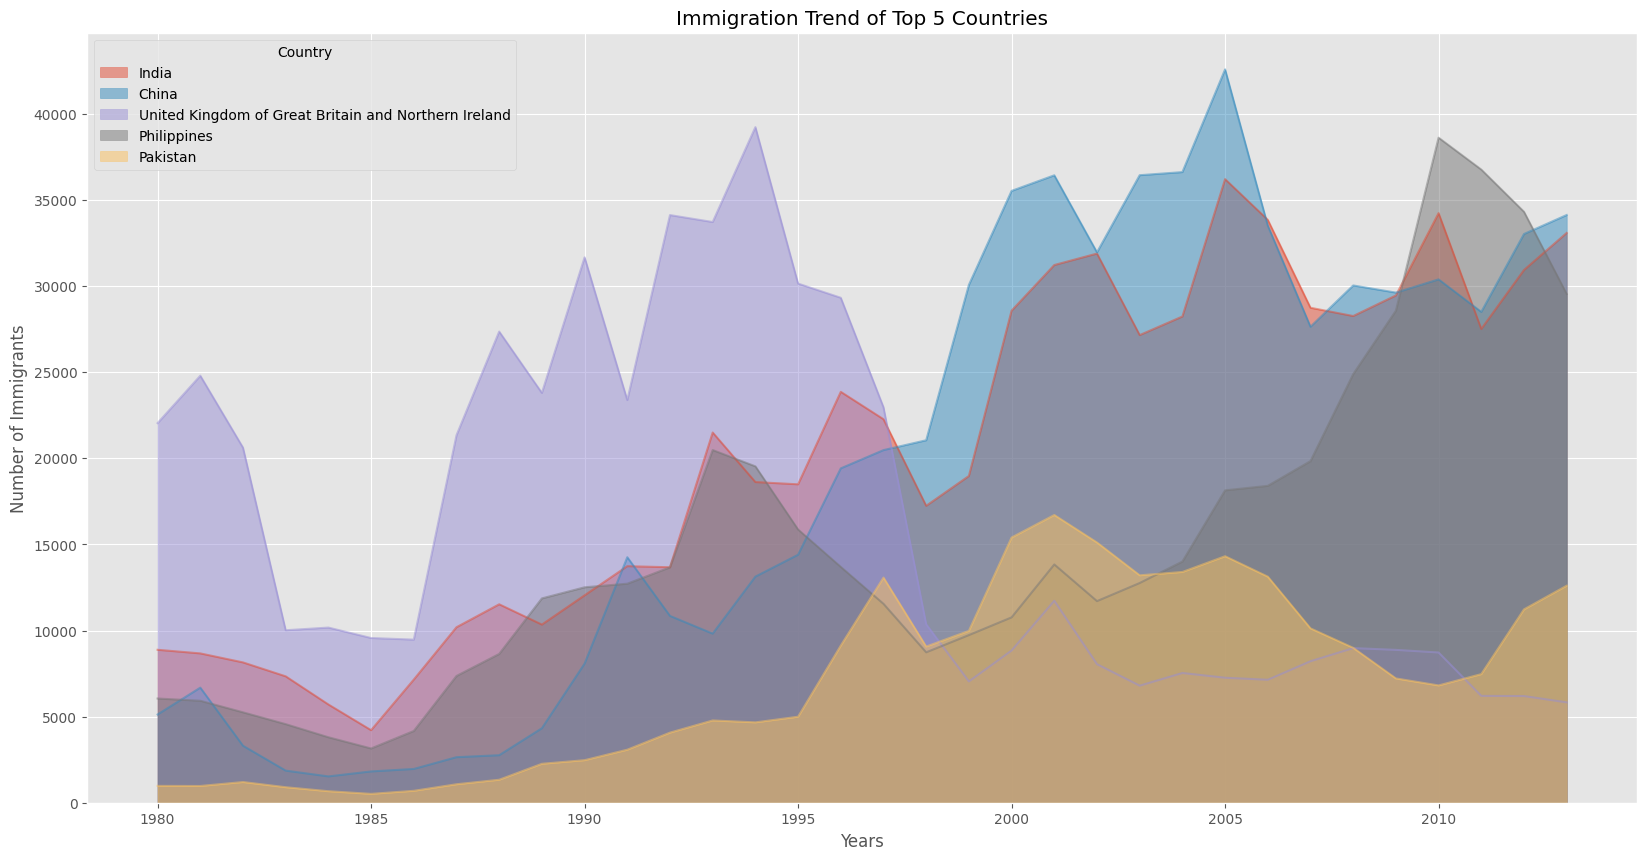

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # опционально: задаем стиль ggplot
# Проверяем версию Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
# Для построения графика изменяем тип индексов строк (года)
# на integer
df_top5.index = df_top5.index.map(int)
# Построение графика типа ‘area’ встроенной
# в pandas суб-библиотекой matplotlib
df_top5.plot(kind='area',
 stacked=False,
 figsize=(20, 10), # размер области построения графика
 )
#Задаем наименование графика
plt.title('Immigration Trend of Top 5 Countries')
#Задаем наименование оси Y
plt.ylabel('Number of Immigrants')
#Задаем наименование оси X
plt.xlabel('Years')
# Выводим график со всеми параметрами на экран
plt.show()


In [12]:
df_can['2013'].head()

,2013
Country,
India,33087
China,34129
United Kingdom of Great Britain and Northern Ireland,5827
Philippines,29544
Pakistan,12603


In [13]:
# np.histogram возвращает два значения
count, bin_edges = np.histogram(df_can['2013'])
print(count) # подсчет частоты появления данных
print(bin_edges) # количество столбцов, по умолчанию – 10

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


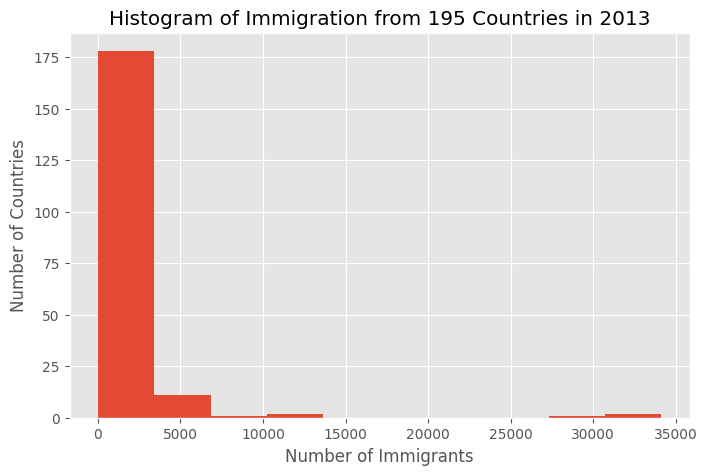

In [14]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of Immigration from 195 Countries in 2013') # добавление названия
plt.ylabel('Number of Countries') # добавление наименования оси у
plt.xlabel('Number of Immigrants') # наименование оси х
plt.show() #Построение диаграммы

# **Построение BarChar**

In [15]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

,Iceland
1980,17
1981,33
1982,10
1983,9
1984,13


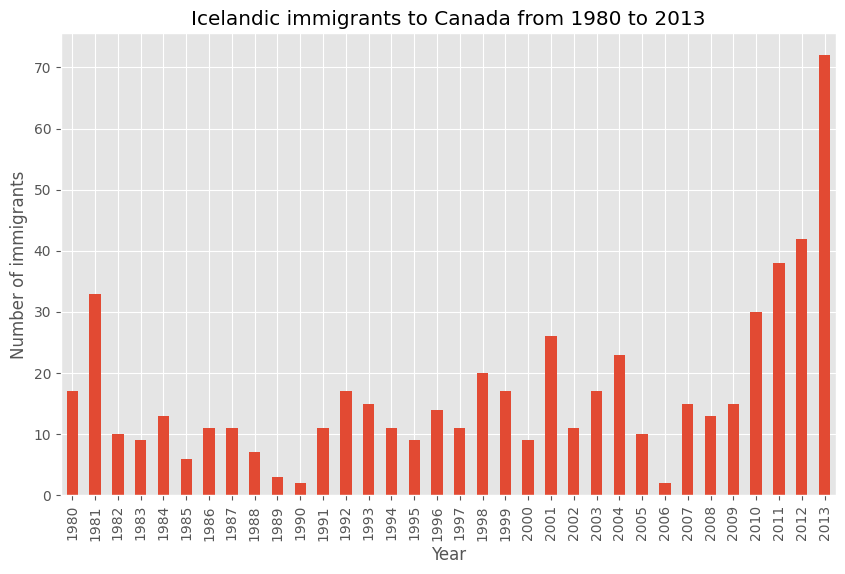

In [16]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot
plt.show()

При изменении знаения параметра **kind** в функции plot изменяется отображение диаграммы. При значении  ***barh*** столбцы отрисовываются вертикально, при значении  ***bar***  - горизонтально

**Вывод :** В данной практической работе были получены навыки использования библиотеки Matplotpib для визуализации данных и построения диаграммы, изучен облачный сервис для обработки данных и машинного обучения Google colab . В ходе работы была обнаружена ошибка, связанная с использованием метода sum ( ошибка конкатенации типа int со str). Чтобы её исправить необходимо использовать метод loc, который позволяет обращаться к стоблцам и строкам по конкретной метке , ограничивая отбор данных по годам ( начиная с 1980 года).